In [1]:
!pip install -U pandas

     |████████████████████████████████| 10.5MB 2.3MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.0 which is incompatible.
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [1]:
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

!gdown --id 1W35olSMAhKGTxxMk8J_-5ZjPQVV94N4Y

Downloading...
From: https://drive.google.com/uc?id=1W35olSMAhKGTxxMk8J_-5ZjPQVV94N4Y
To: /content/AB_NYC_2019.csv
7.08MB [00:00, 26.1MB/s]


In [3]:
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

In [4]:
pd.__version__

'1.1.0'

In [26]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
df.head(n=3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [28]:
print ("Number of Columns",len(df.columns))
print ('DataSet Size:', df.shape)
df.columns

Number of Columns 16
DataSet Size: (48895, 16)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [32]:
df.shape

(38821, 16)

In [33]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [34]:
df.last_review.head()

0    2018-10-19
1    2019-05-21
3    2019-07-05
4    2018-11-19
5    2019-06-22
Name: last_review, dtype: object

In [35]:
df['last_reveiw'] = pd.to_datetime(df.last_review)
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                               object
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
last_reveiw                       datetime64[ns]
dtype: object

In [36]:
df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude'],
        axis=1, inplace=True)

In [37]:
df.shape

(38821, 10)

In [38]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_reveiw
0,Brooklyn,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19
1,Manhattan,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21
3,Brooklyn,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05
4,Manhattan,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19
5,Manhattan,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019-06-22


In [39]:
# Select one column
df.room_type.head()

0       Private room
1    Entire home/apt
3    Entire home/apt
4    Entire home/apt
5    Entire home/apt
Name: room_type, dtype: object

In [40]:
df = df[['room_type', 'price', 'number_of_reviews', 'reviews_per_month']]
df.head()

,room_type,price,number_of_reviews,reviews_per_month
0,Private room,149,9,0.21
1,Entire home/apt,225,45,0.38
3,Entire home/apt,89,270,4.64
4,Entire home/apt,80,9,0.10
5,Entire home/apt,200,74,0.59


In [42]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [43]:
## Rename
df = df.rename(columns={'price':'price_per_night'})
df.head()

,room_type,price_per_night,number_of_reviews,reviews_per_month
0,Private room,149,9,0.21
1,Entire home/apt,225,45,0.38
3,Entire home/apt,89,270,4.64
4,Entire home/apt,80,9,0.10
5,Entire home/apt,200,74,0.59


In [45]:
df = df[['price_per_night', 'room_type', 'reviews_per_month', 'number_of_reviews']]
df.head()

,price_per_night,room_type,reviews_per_month,number_of_reviews
0,149,Private room,0.21,9
1,225,Entire home/apt,0.38,45
3,89,Entire home/apt,4.64,270
4,80,Entire home/apt,0.10,9
5,200,Entire home/apt,0.59,74


In [47]:
df['estimated_revenue'] = df.price_per_night * df.number_of_reviews
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price_per_night,room_type,reviews_per_month,number_of_reviews,estimated_revenue
0,149,Private room,0.21,9,1341
1,225,Entire home/apt,0.38,45,10125
3,89,Entire home/apt,4.64,270,24030
4,80,Entire home/apt,0.10,9,720
5,200,Entire home/apt,0.59,74,14800


In [48]:
df[df.room_type =='Private room'].head()


,price_per_night,room_type,reviews_per_month,number_of_reviews,estimated_revenue
0,149,Private room,0.21,9,1341
6,60,Private room,0.40,49,2940
7,79,Private room,3.47,430,33970
8,79,Private room,0.99,118,9322
11,85,Private room,1.50,188,15980


In [49]:
df[df.room_type =='Private room'].room_type.unique()

array(['Private room'], dtype=object)

In [51]:
for i, row in df.iterrows():
  print (row.room_type)
  break

Private room


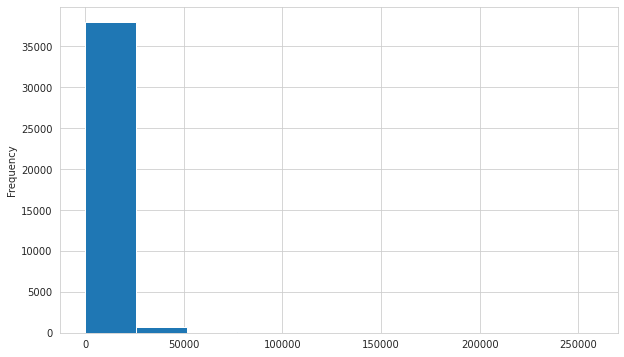

In [52]:
df.estimated_revenue.plot.hist(figsize=(10, 6))

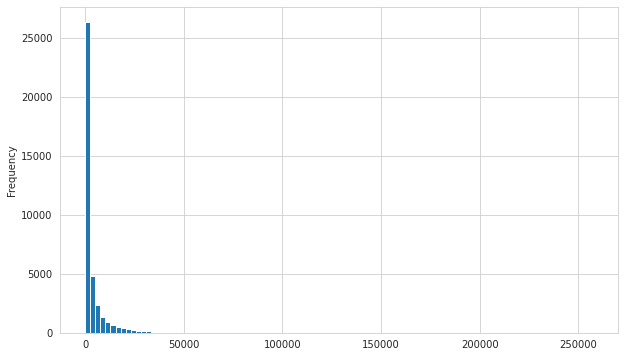

In [54]:
df.estimated_revenue.plot.hist(bins = 100, figsize=(10, 6))

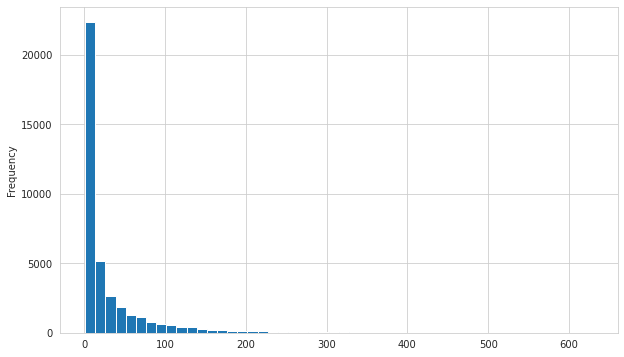

In [56]:
df.number_of_reviews.plot.hist(bins = 50, figsize=(10, 6))

In [55]:
df[df.estimated_revenue > 200000]

,price_per_night,room_type,reviews_per_month,number_of_reviews,estimated_revenue
2163,575,Entire home/apt,5.89,447,257025
30824,2990,Entire home/apt,4.36,69,206310


In [57]:
df.room_type.value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

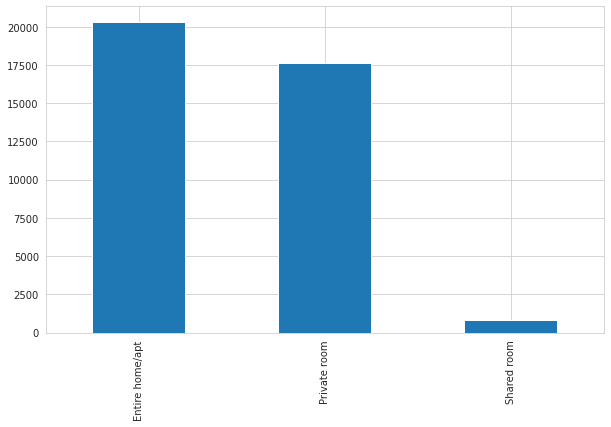

In [59]:
df.room_type.value_counts().plot.bar(figsize=(10, 6))